In [16]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("netflix_titles.csv")

**1º Passo: Limpeza de Dados**

* Analisar o dataset
* Limpar e analisar as colunas
* Remover colunas duplicadas 

In [2]:
# Analisando o número de linhas e colunas
data.shape
# Verificando os nomes das colunas
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Verificando os valores nulos**

In [3]:
# Analisando a quantidade de valores nulos presentes em nosso dataframe
data.isna().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
rating            10
date_added        11
country          476
cast             570
director        1969
dtype: int64

**Verificando os valores únicos**

In [4]:
# O metodo nunique retornar os valores únicos presentes em uma coluna
data.nunique().sort_values()

type               2
rating            14
release_year      72
duration         201
listed_in        461
country          554
date_added      1524
director        3301
cast            5469
title           6172
description     6226
show_id         6234
dtype: int64

**Analisando os valores duplicados presentes nas colunas**

In [5]:
# Utilizando o metodo duplicated para analisar a quantidade de valores duplicados presentes em nossas colunas
data.duplicated().sum()

0

**Fazendo uma cópia do nosso dataframe, isso é importante para não afetarmos o dataframe original ao realizarmos a análise**

In [6]:
netflix_dados = data.copy()

**Limpando os valores nulos, verificamos anteriormente e agora iremos eliminá-los**

In [7]:
# Limpando os valores nulos
netflix_dados.dropna(inplace=True)
# Conferindo a quantidade de valores nulos após a limpeza, tem que ser 0
netflix_dados.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
# Podemos verificar que reduziu bastante com o shape
netflix_dados.shape

(3774, 12)

**Convertendo para o formato padrão de data e hora**

In [33]:
# Modifiquei a coluna date_added para o formato data e hora
netflix_dados["date_added"] = pd.to_datetime(netflix_dados['date_added'])
netflix_dados['day_added'] = netflix_dados['date_added'].dt.day
netflix_dados['year_added'] = netflix_dados['date_added'].dt.year
netflix_dados['month_added'] = netflix_dados['date_added'].dt.month

**Vamos começar a parte da visualização dos dados, utilizando o Seaborn**
* 1º Gráfico: Relação entre os filmes e as séries, qual é a mais assistida ?

**Relação filmes e séries**
   
Para realizar esse gráfico é interessante utilizar o countplot, para compararmos visuamente os dados.

O countplot cria gráficos de barras de acordo com o **número de observações** presentes em uma categoria, ou coluna do nosso dataframe. Assim podemos comparar diretamente quais tem a **maior frequência** entre elas.



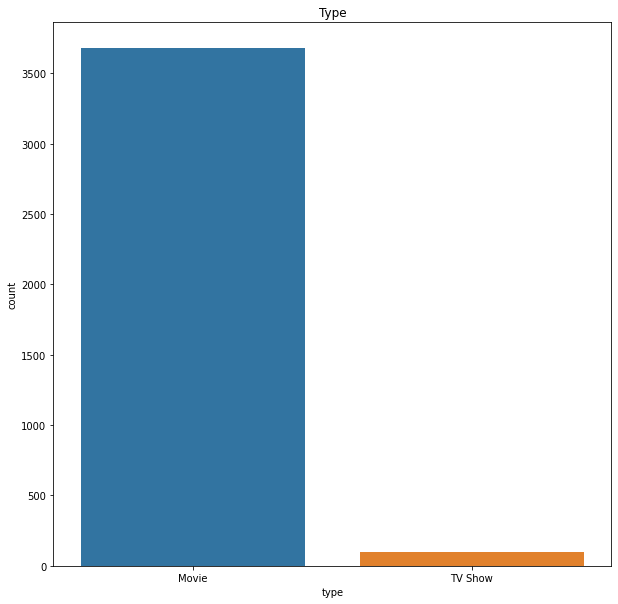

In [48]:
sns.countplot(x=netflix_dados["type"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')
plt.show()

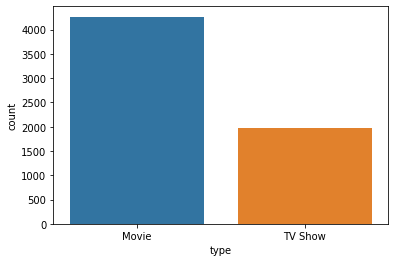

In [54]:
# Estou pegando a coluna type, onde temos movie e séries e carregando nosso dataframe
sns.countplot(x="type", data = data)
plt.show()